In [1]:
# Import packages
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from tqdm import tqdm
from ddpg import DDPGAgent

In [3]:
# Parameters
testing_episodes = 1000

batch_size = 32
memory_size = 200_000
gamma = 0.99
learning_rate = 0.0005
tau = 0.005
exploration_sd = 0.1
checkpoints = [600, 800, 1000, 'final']

# Initialize environment and agent

In [4]:
env = gym.make("InvertedDoublePendulum-v4", render_mode='rgb_array')
state_size = env.observation_space.shape[0]

agent = DDPGAgent(state_size=state_size,
                         gamma=gamma,
                         learning_rate=learning_rate,
                         tau=tau,
                         exploration_sd=exploration_sd,
                         memory_size=memory_size)

# Test agent with different checkpoints and different malfunction_probability values

## malfunction_probability = 0%

In [5]:
malfunction_probability = 0
returns_dict = dict()
steps_dict = dict()

for checkpoint in checkpoints:
    # Load networks
    actor_filepath = os.path.join('models', f'DDPG_{checkpoint}_actor.pt')
    critic_filepath = os.path.join('models', f'DDPG_{checkpoint}_critic.pt')
    agent.load_networks(actor_filepath, critic_filepath)
    
    # Test
    test_returns = []
    test_steps = []
    for _ in tqdm(range(testing_episodes)):
        episode_return, episode_steps = agent.generate_greedy_episode(env, malfunction_probability=malfunction_probability)
        test_returns.append(episode_return)
        test_steps.append(episode_steps)
        
    # Update dictionaries
    returns_dict[checkpoint] = test_returns
    steps_dict[checkpoint] = test_steps

# Create DataFrames
steps_df = pd.DataFrame(steps_dict)
returns_df = pd.DataFrame(returns_dict)

100%|██████████| 1000/1000 [02:54<00:00,  5.73it/s]


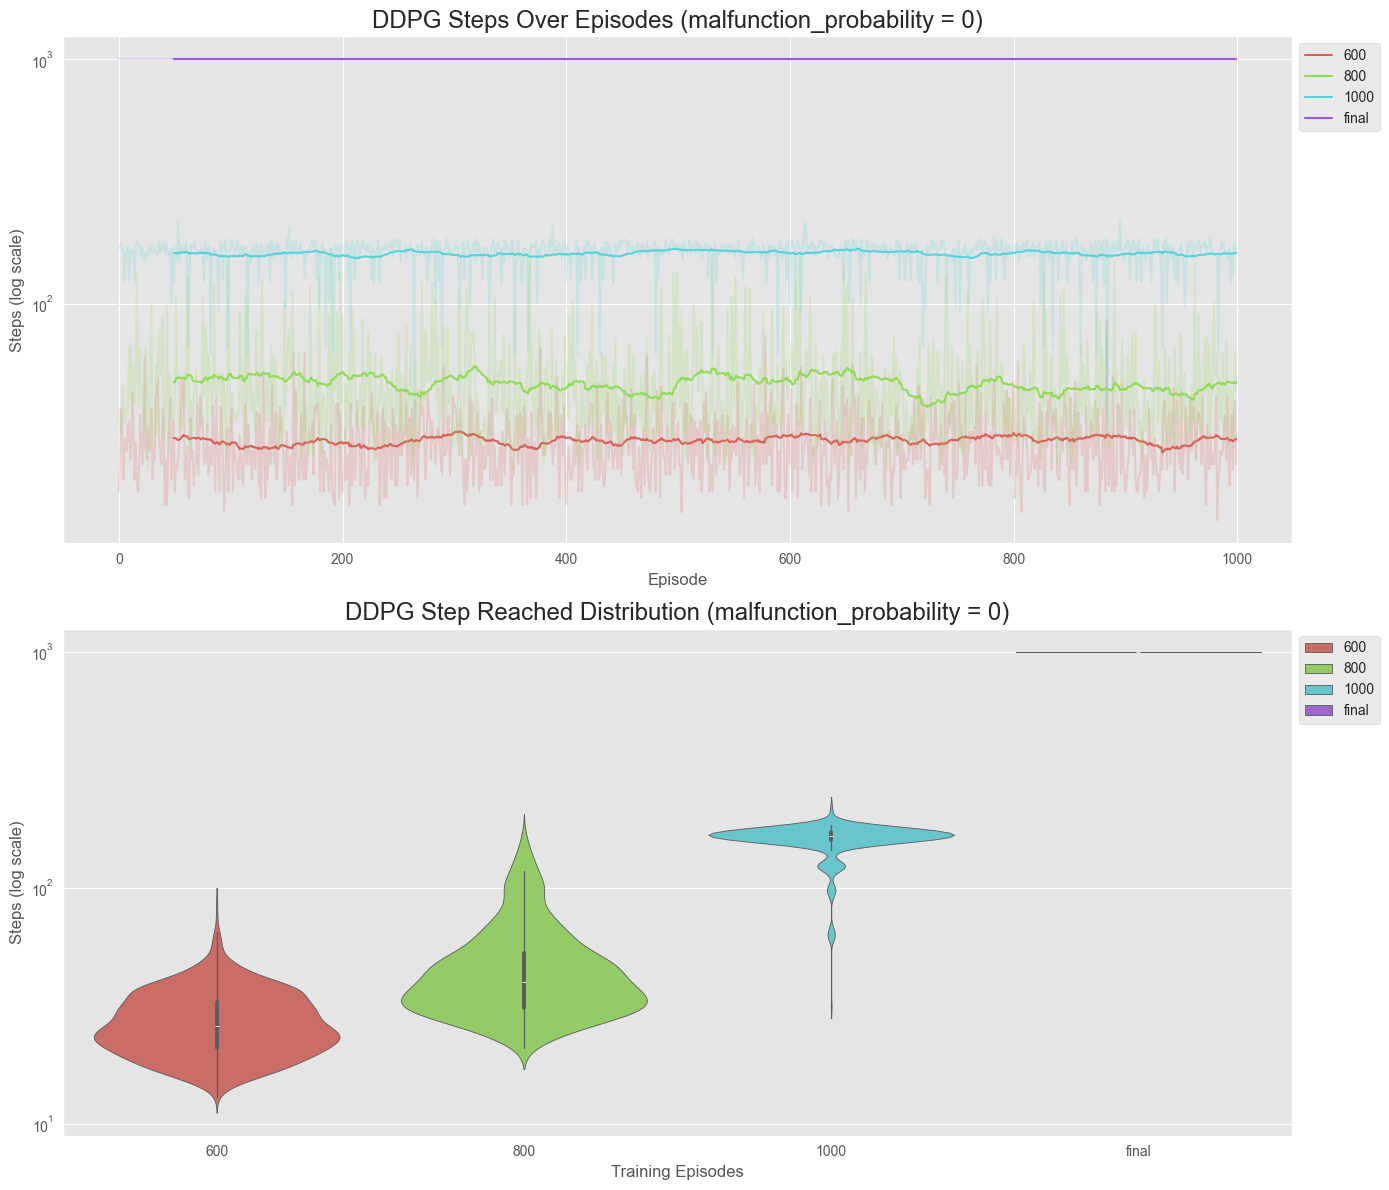

In [7]:
# Plotting parameters
plt.style.use('ggplot')
palette = sns.color_palette('hls', len(checkpoints))
sns.set_palette(palette)
ma_window = 50
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

# Plot 1
for checkpoint, color in zip(checkpoints, palette):
    ax1.plot(steps_dict[checkpoint], alpha=0.2, color=color)
    ax1.plot(pd.Series(steps_dict[checkpoint]).rolling(ma_window).mean(), label=f'{checkpoint}', color=color)
ax1.set_title(f'DDPG Steps Over Episodes ({malfunction_probability = })', fontsize='xx-large')
ax1.set_xlabel('Episode')
ax1.legend(ncols=1, loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_ylabel('Steps (log scale)')
ax1.set_yscale('log')

# Plot 2
sns.violinplot(steps_df, legend=True, log_scale=True, ax=ax2)
ax2.legend(ncols=1, loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_xlabel('Training Episodes')
ax2.set_ylabel('Steps (log scale)')
ax2.set_title(f'DDPG Step Reached Distribution ({malfunction_probability = })', fontsize='xx-large')

plt.show()

## malfunction_probability = 1%

In [8]:
malfunction_probability = 0.01
returns_dict = dict()
steps_dict = dict()

for checkpoint in checkpoints:
    # Load networks
    actor_filepath = os.path.join('models', f'DDPG_{checkpoint}_actor.pt')
    critic_filepath = os.path.join('models', f'DDPG_{checkpoint}_critic.pt')
    agent.load_networks(actor_filepath, critic_filepath)
    
    # Test
    test_returns = []
    test_steps = []
    for _ in tqdm(range(testing_episodes)):
        episode_return, episode_steps = agent.generate_greedy_episode(env, malfunction_probability=malfunction_probability)
        test_returns.append(episode_return)
        test_steps.append(episode_steps)
        
    # Update dictionaries
    returns_dict[checkpoint] = test_returns
    steps_dict[checkpoint] = test_steps

# Create DataFrames
steps_df = pd.DataFrame(steps_dict)
returns_df = pd.DataFrame(returns_dict)

100%|██████████| 1000/1000 [02:07<00:00,  7.82it/s]


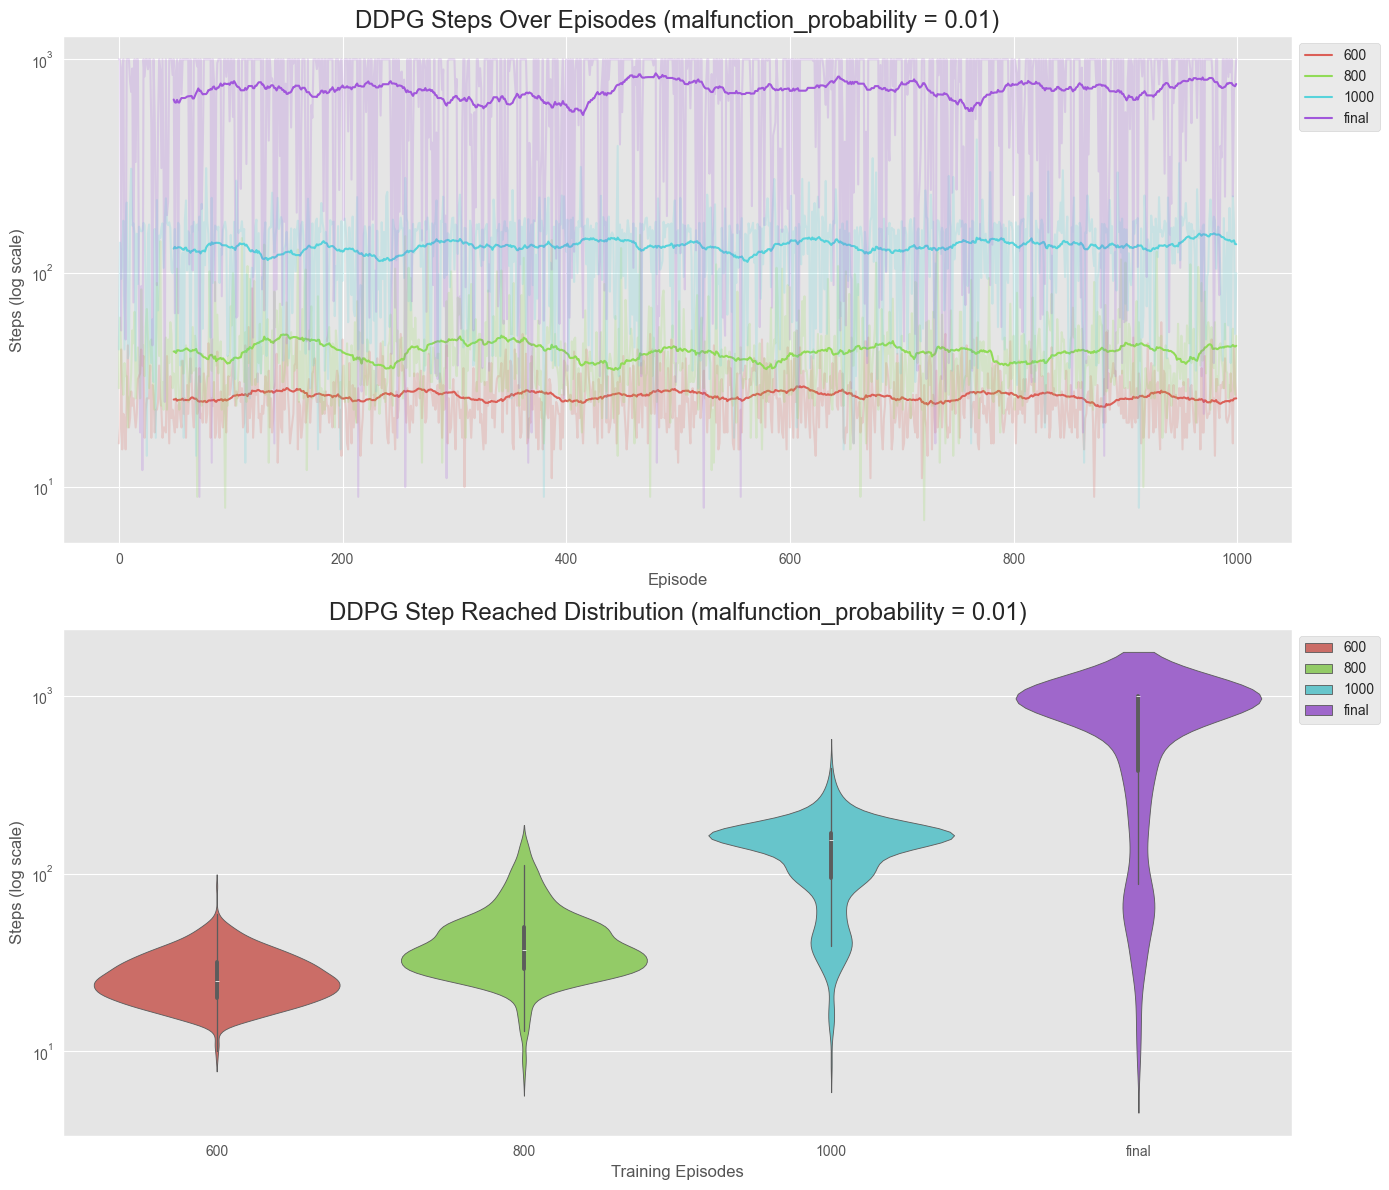

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), tight_layout=True)

# Plot 1
for checkpoint, color in zip(checkpoints, palette):
    ax1.plot(steps_dict[checkpoint], alpha=0.2, color=color)
    ax1.plot(pd.Series(steps_dict[checkpoint]).rolling(ma_window).mean(), label=f'{checkpoint}', color=color)
ax1.set_title(f'DDPG Steps Over Episodes ({malfunction_probability = })', fontsize='xx-large')
ax1.set_xlabel('Episode')
ax1.legend(ncols=1, loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_ylabel('Steps (log scale)')
ax1.set_yscale('log')

# Plot 2
sns.violinplot(steps_df, legend=True, log_scale=True, ax=ax2)
ax2.legend(ncols=1, loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_xlabel('Training Episodes')
ax2.set_ylabel('Steps (log scale)')
ax2.set_title(f'DDPG Step Reached Distribution ({malfunction_probability = })', fontsize='xx-large')

plt.show()

# Visual inspection

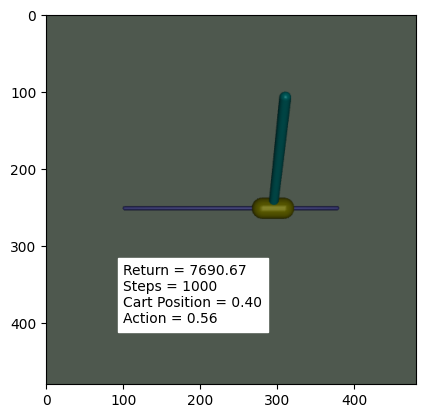

In [14]:
checkpoint = 'final'
malfunction_probability = 0.01

actor_filepath = os.path.join('models', f'DDPG_{checkpoint}_actor.pt')
critic_filepath = os.path.join('models', f'DDPG_{checkpoint}_critic.pt')
agent.load_networks(actor_filepath, critic_filepath)

plt.style.use('default')
_, _ = agent.generate_greedy_episode(env, malfunction_probability=malfunction_probability, render=True)